# Assignment 2: Elasticsearch and Text Mining

Due: Monday, December 12, 2022, at 2pm via Moodle

**Team Members**:
* Björn Bulkens
* Klemens Gerber
* Daniel M. Knorr

### Submission Guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find this notebook contains some pre-filled cells that you should complete for the individual tasks.
- For answers requiring written solutions, use Markdown cells (in combination with Jupyter LaTeX support) **inside this notebook**. Do *not* hand in any separate files, simply re-upload the `.ipynb` file.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- Make sure that the names of all team members are present in the solution.

In [1]:
from IPython.display import clear_output

// actually powershell command //
conda install --file requirements.txt -c conda-forge

In [2]:
# %%bash
# ./ ~/.bashrc
# python3 -m spacy download en_core_web_sm
# Install required language model for spaCy
clear_output()


## Question 2-1: "The Simpsons" Dataset (1 + 4 + 3 + 2 + 6 + 5 = 21 points)

"The Simpsons" is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this exercise, you will work with the dataset that contains characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
We will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`

Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows, and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

In [1]:
# General imports
import os

import pandas as pd
import numpy as np
import spacy
import matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Ensure matplotlib works correctly with Jupyter
%matplotlib inline

### 1. Data Loading (1 point)
Load the four datasets in the respective variables using pandas, and make sure to set the type of the `character_id` to integer.

In [2]:
df_characters = pd.read_csv("data/simpsons_characters.csv")
df_locations = pd.read_csv("data/simpsons_locations.csv")
df_script = pd.read_csv("data/simpsons_script_lines.csv")
df_episodes = pd.read_csv("data/simpsons_episodes.csv")

C:\Users\gerbk\AppData\Local\Temp\ipykernel_13408\1991298596.py:3: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_script = pd.read_csv("data/simpsons_script_lines.csv")


Drop all lines associated with the (non-numeric) character ID `142024`.

In [3]:
df_script.drop(df_script[df_script.character_id == "142024"].index, inplace = True)


Next, use panda's `.head()` function to inspect the top rows of each dataframe.

In [4]:
df_characters.head()


,id,name,normalized_name,gender
0,7,Children,children,NaN
1,12,Mechanical Santa,mechanical santa,NaN
2,13,Tattoo Man,tattoo man,NaN
3,16,DOCTOR ZITSOFSKY,doctor zitsofsky,NaN
4,20,Students,students,NaN


In [5]:
df_locations.head()


,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [6]:

df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [7]:
df_episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


### 2. Prominent Characters (4 points)

Let us now take a look at the most important characters of the show. To start, retrieve the most prominent characters by the number of spoken words/lines throughout the show. 

Extract the top 10 characters based on the number of spoken words (word count), as well as the 10 most prominent characters regarding their sum total number of lines.

You might notice that there is a column with `word_count` in the `df_scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` entries and any other string characters in that column. You can use the provided `conv` function for this.

In [54]:
df_script.drop(df_script[df_script.character_id == 3592].index, inplace = True)
df_script.drop(df_script[df_script.character_id == 2739].index, inplace = True)
df_script.drop(df_script[df_script.character_id == 241].index, inplace = True)

In [55]:
def conv(row):
    try:
        return int(row)
    except:
        return np.nan
# First apply the conv() filtering on the word count
df_script["word_count"] = df_script['word_count'].map(conv)
df_script["character_id"] = df_script['character_id'].map(conv)

# And then drop all `nan` values in "word_count"
# Hint: Make sure the operation is done in-place.
df_script.dropna(subset=[ 'word_count'], inplace = True)
df_script.dropna(subset=[ 'character_id'], inplace = True)
df_script.head(20)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33
5,9554,32,214,Martin Prince: (HOARSE WHISPER) I don't think ...,877000,True,38,3.0,Martin Prince,Springfield Elementary School,I don't think there's anything left to say.,i dont think theres anything left to say,8
6,9555,32,215,Edna Krabappel-Flanders: Bart?,881000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,Bart?,bart,1
7,9556,32,216,Bart Simpson: Victory party under the slide!,882000,True,8,3.0,Bart Simpson,Springfield Elementary School,Victory party under the slide!,victory party under the slide,5
9,9558,32,218,Lisa Simpson: (CALLING) Mr. Bergstrom! Mr. Ber...,889000,True,9,374.0,Lisa Simpson,Apartment Building,Mr. Bergstrom! Mr. Bergstrom!,mr bergstrom mr bergstrom,4
10,9559,32,219,"Landlady: Hey, hey, he Moved out this morning....",893000,True,469,374.0,Landlady,Apartment Building,"Hey, hey, he Moved out this morning. He must h...",hey hey he moved out this morning he must have...,19


In [56]:
# Now aggregate the top characters by words:
df_script['character_id'] = df_script['character_id'].astype('int')
top_characters_by_words = df_script.groupby(["character_id", "raw_character_text"])["word_count"].sum()
top_characters_by_words.sort_values( ascending = False, inplace = True)

# And do the same by lines:
top_characters_by_lines = df_script.groupby(["character_id", "raw_character_text"])["character_id"].size()
top_characters_by_lines.sort_values( ascending = False, inplace = True)


In [57]:
top_characters_by_words.head(10)

character_id  raw_character_text 
1             Marge Simpson          1269710
2             Homer Simpson           680208
9             Lisa Simpson            363224
8             Bart Simpson            217113
15            C. Montgomery Burns      36212
17            Moe Szyslak              32855
3             Seymour Skinner          28138
11            Ned Flanders             22909
139           Krusty the Clown         20701
71            Chief Wiggum             19992
Name: word_count, dtype: int64

In [58]:
top_characters_by_lines.head(10)


character_id  raw_character_text 
2             Homer Simpson          27910
1             Marge Simpson          13192
8             Bart Simpson           13013
9             Lisa Simpson           10769
15            C. Montgomery Burns     3087
17            Moe Szyslak             2809
3             Seymour Skinner         2390
11            Ned Flanders            2057
31            Grampa Simpson          1807
71            Chief Wiggum            1796
Name: character_id, dtype: int64


Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.

In the second plot, you should do the same, but this time considering the number of lines (not words) for each character. Note that the characters shown in the two plots might differ.


<AxesSubplot:xlabel='character_id,raw_character_text'>

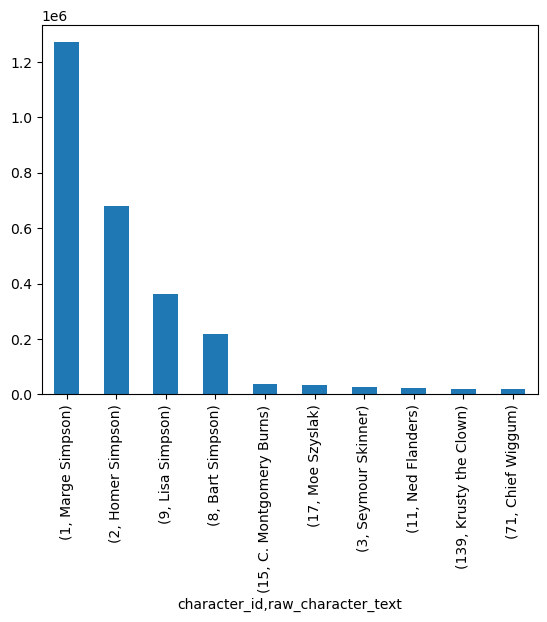

In [59]:
# First plot: Top 10 characters by word count
# Hint: Try to use the integration of matplotlib and pandas to directly plot from a dataframe.

top_characters_by_words.head(10).plot( x = "raw_character_text", y = [2], kind ="bar")


<AxesSubplot:xlabel='character_id,raw_character_text'>

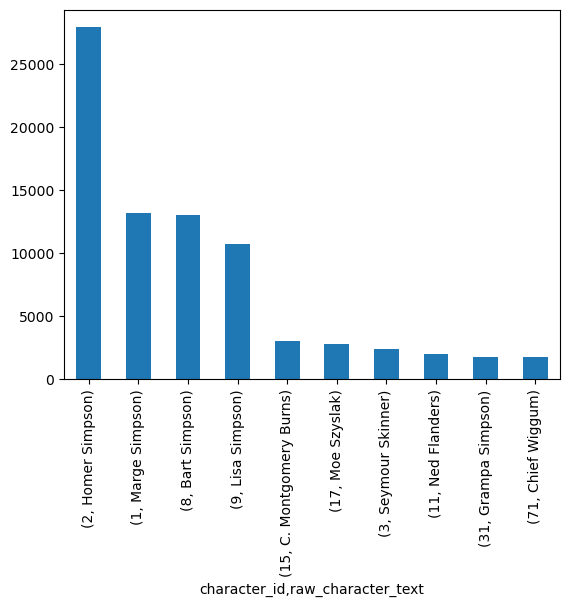

In [60]:
# Second plot: Top 10 characters by lines

top_characters_by_lines.head(10).plot( x = "raw_character_text", y = [2], kind ="bar")

Compare the results of the two plots: What do you notice? Do the results look correct to you?

Homer Simpsons seems to say less words in a lot more lines than the other main characters. This is likely due to his character being prone to onelines like "doh!" and all around him being portrayed as less inteligent. This phenomenon can also be seen when comparing Marge Simpson to Bart Simpson. Marge has about the same amount of lines as bart while using six times the words Bart uses in his lines. This seems unusual.  Also there is a clear distinction between the 4 main characters and the rest of the ensemble in terms of word count. 

There is an error in the Data suggesting that ABBA, entire Town and Robert Pinsky have a majority of words in the show. This is likely due to data quality problems, as they are not major characters in the show which is why we have removed these outliers.

### 3. Common Words (3 points)

We continue by examining the dialogues in more detail, by looking at the top 20 most commonly appearing words (tokens).

To generate a meaningful output, use the following pre-processing pipeline, parts of which were explained in more detail during the tutorials and the lecture:
- Use spaCy (`en_core_web_sm`) to process all text.
- Instead of considering the raw text, use the lemmatized token provided by spaCy.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

In [14]:
# Load the spacy model specified above. Make sure to disable the "ner" component for more speed.
nlp = spacy.load("en_core_web_sm")
nlp.disable_pipes('ner')

word_list =[]

# Iterate over the spoken words (Hint: df_script) and append the lemmatized tokens as detailed above
for spoken_words in df_script["spoken_words"]: 
    doc = nlp(spoken_words)
    for token in doc:
        if token.pos_ != "PUNCT":
            if token.is_stop == False:
                word_list.append(token.lemma_)


counts = pd.Series(word_list).value_counts()
counts.sort_values(ascending = False, inplace = True)
counts.head(20)

oh       8483
like     6235
go       5486
know     5458
get      5075
hey      4320
think    4109
right    4107
come     4055
Homer    3974
look     3719
good     3646
want     3574
Bart     3546
to       3483
let      3277
uh       3066
yeah     2935
time     2759
man      2667
dtype: int64

Now plot a graph with the top 20 words on the x-axis and their respective frequencies on the y-axis, similar to the previous question.

<AxesSubplot:>

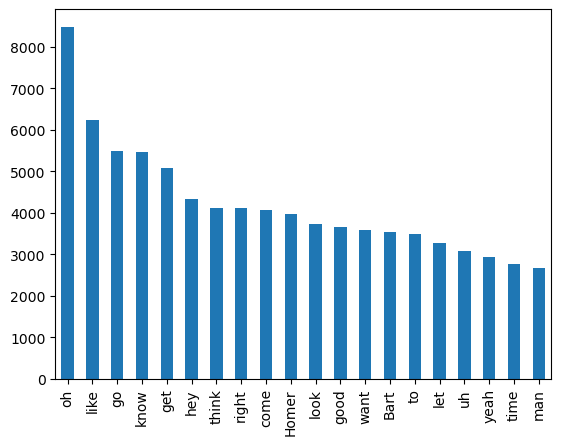

In [15]:
# Provide a plot of the frequencies of the most common 20 words.
counts.head(20).plot( x = [0], y = [1], kind ="bar")

### 4. Named Entity Wordcloud (2 points)

Apply named entity recognition (NER) using SpaCy and generate a word cloud of the most commonly appearing 50
named entities that have the type `PERSON`. Visualize the resulting entities in a word cloud.
Take into account that you cannot simply use the 
output of the previous task, since NER was explicitly disabled.
 Since the named entity recognition takes quite some time, use only the first `10000` scripts.

In [16]:
# Load the English spacy model again, but this time do not disable the NER module.
persons = []

nlp = spacy.load("en_core_web_sm")

# Extract named entities of the type "PERSON" from each script.
for script in df_script.spoken_words.tolist()[:10000]:
    doc = nlp(script)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            persons.append(ent.text)

In [17]:
persons_pd = pd.Series(persons).value_counts()
persons_pd.sort_values(ascending = False, inplace = True)
persons_pd.head(50)

Lisa                 89
Marge                79
Simpson              70
Burns                47
Homer Simpson        45
Smithers             36
Homie                32
Maggie               32
Michael Jackson      22
Bart Simpson         19
Moe                  17
Lisa Simpson         16
Martin               16
Dad                  15
Principal Skinner    14
Bart                 13
Plow                 12
Lis                  11
Krabappel            11
Ned Flanders         10
Bob                  10
Ned                  10
Lurleen              10
Skinner               9
Sideshow Bob          9
Wiggum                8
Homer                 8
Barney                8
Bergstrom             8
Aunt Selma            7
Lovejoy               7
Hibbert               7
Springfield           7
Lenny                 7
Lanley                7
Laura                 7
Nelson                6
Strawberry            6
Kent Brockman         6
Steve Sax             5
Michael               5
Marge Simpson   

To visualize the word cloud, you may use the `wordcloud` package, which works in combination with `matplotlib`. Make sure to limit the number of visible words to 50, and the maximum font size to 60.

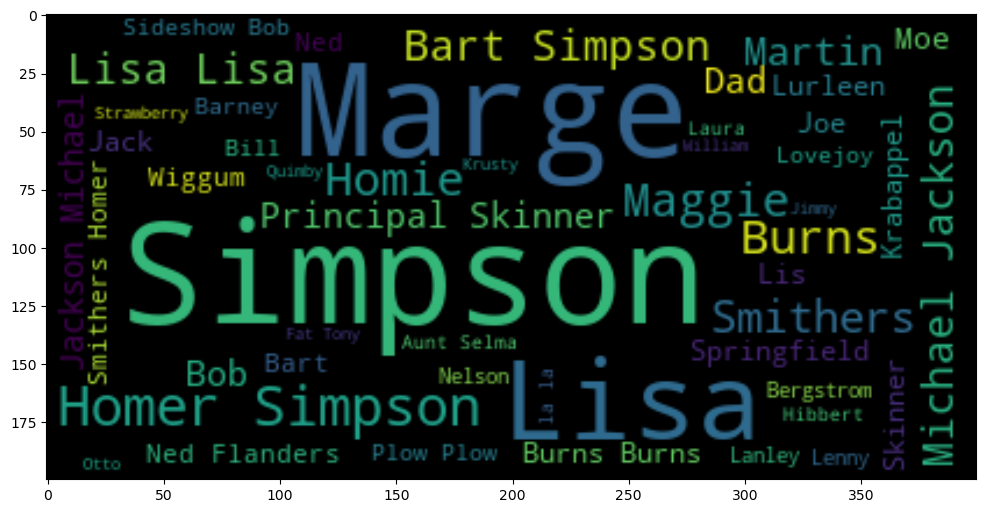

In [18]:
# Create matplotlib skeleton for word cloud figure
string_from_list=(" ").join(persons)

cloud = WordCloud(max_words = 50, max_font_size = 60).generate(string_from_list)

fig = plt.figure(1, figsize=(12,12))

plt.imshow(cloud, interpolation="bilinear")
#plt.axes("off")



### 5. Normalized Word Importance with TF-IDF (6 points)

The top words so far seem not too informative. We wish to find out the importance of particular words for specific characters, by looking at normalized frequency counts.
As an example, we expect the younger Simpson family members to exhibit a disproportionate frequency for the word "mom" or "dad", compared to other characters.

We looked at the normalization through Term Frequency - Inverse Document Frequency (TF-IDF) in the lecture, which we will use here to investigate lines by `Lisa Simpson` and `Bart Simpson`.

In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from the `scikit-learn` library. In addition, filter out stop words and words with a frequency of less than 5 occurrences from the analysis. Then plot the TF-IDF values for the top 10 words for Lisa and Bart as bar plots.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

df_script = pd.read_csv("data/simpsons_script_lines.csv")

Lisa_Lines = df_script.loc[df_script["character_id"] == 9, 'normalized_text'] 
Bart_Lines = df_script.loc[df_script["character_id"] == 8, 'normalized_text'] 

C:\Users\gerbk\AppData\Local\Temp\ipykernel_13408\123284941.py:4: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_script = pd.read_csv("data/simpsons_script_lines.csv")


In [20]:
Lisa_Lines.head

<bound method NDFrame.head of 1                                       wheres mr bergstrom
3                                 that life is worth living
9                                 mr bergstrom mr bergstrom
11                       do you know where i could find him
13        the train how like him traditional yet environ...
                                ...                        
130989    i dont think shauna should choose any of you s...
130995         well bart i guess thats our cue to skedaddle
131038    face it were just kids we cant afford stuff wi...
131054    i sold a couple of my rare jazz records after ...
131058                        and dad donated something too
Name: normalized_text, Length: 9732, dtype: object>

In [21]:
print(Bart_Lines)

7                             victory party under the slide
17                             hey thanks for your vote man
19        well you got that right thanks for your vote g...
21        well dont sweat it just so long as a couple of...
23                                                    lewis
                                ...                        
131051    i woke up and the money jar was full that mean...
131052                                          snowball ii
131056    really but thats been in your family for gener...
131062    its weird to hear myself saying this but i lov...
131071                                  look thats our ship
Name: normalized_text, Length: 11268, dtype: object


In [22]:
# Plot the top 10 occurrences, weighted by TF-IDF

sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

tokens_without_sw_lisa = []
tokens_without_sw_bart = []

for a in Lisa_Lines.values:
    if type(a) == str:
        text_tokens = sp(a)
        for token in text_tokens:
            if token.text not in all_stopwords:
                tokens_without_sw_lisa.append(token.text)

for b in Bart_Lines.values:
    if type(b) == str:
        text_tokens = sp(b)
        for token in text_tokens:
            if token.text not in all_stopwords:
                tokens_without_sw_bart.append(token.text)



In [23]:
from collections import Counter

def removeElements(lst, k):
    counted = Counter(lst)

    temp_lst = []
    for el in counted:
        if counted[el] < k:
            temp_lst.append(el)

    res_lst = []
    for el in lst:
        if el not in temp_lst:
            res_lst.append(el)
    return(res_lst)

# Driver code


Lisa_List = removeElements(tokens_without_sw_lisa, 5)
Bart_List = removeElements(tokens_without_sw_bart, 5)


In [24]:
#instantiate CountVectorizer() 
cvl=CountVectorizer() 
cvb=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector_lisa=cvl.fit_transform(Lisa_List)
word_count_vector_bart=cvb.fit_transform(Bart_List)


In [25]:
tfidf_transformer_lisa=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer_lisa.fit(word_count_vector_lisa)



TfidfTransformer()

In [44]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer_lisa.idf_, index=cvl.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
lisa_frequency = df_idf.sort_values(by=['idf_weights']).head(10)

c:\Users\gerbk\anaconda3\envs\AML_bidde\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

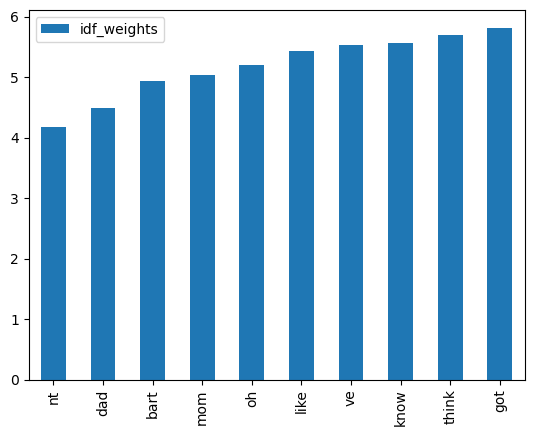

In [45]:
lisa_frequency.plot(kind ="bar")

In [27]:
tfidf_transformer_bart=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer_bart.fit(word_count_vector_bart)

TfidfTransformer()

In [31]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer_bart.idf_, index=cvb.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
bart_frequency = df_idf.sort_values(by=['idf_weights']).head(10)


c:\Users\gerbk\anaconda3\envs\AML_bidde\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
bart_frequency


,idf_weights
nt,4.363370
dad,4.900871
hey,5.155541
oh,5.278453
got,5.391218
like,5.473328
mom,5.541622
ve,5.634841
know,5.658097
yeah,5.786599


<AxesSubplot:>

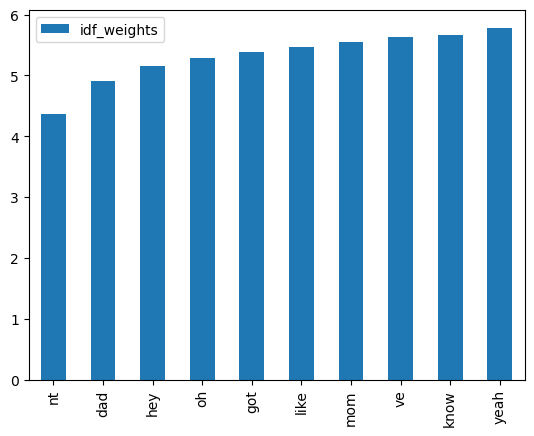

In [43]:
bart_frequency.plot(kind ="bar")

Do your results look correct?

We do not really know if nt qualifies as a stop word, but the results look mostly correct, as there is a certain amount of times, that words like mom and dad are mentioned which indicates, that we are on the right track.

By using `CountVectorizer` over the concatenation of all character-specific lines, we can then also compute a (non-normalized) document similarity between the lines of Lisa and Bart. Use cosine similarity over the two document vectors to compare the similarity.

For the `CountVectorizer`, use the same arguments as before (minimum 5 occurrences and no stop words).

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance


def cosine_distance_countvectorizer_method(s1, s2):
    
    # sentences to list
    allsentences = [s1 , s2]
 
    # text to vector
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)
    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    
    # distance of similarity
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    print('Similarity of the two bodies of text are equal to ',round((1-cosine)*100,2),'%')
    return cosine

cosine_distance_countvectorizer_method(' '.join(Lisa_List), ' '.join(Bart_List))

Similarity of two sentences are equal to  90.66 %


0.0933758301927079

### 6. NNMF Topics (5 points)

Uncover interesting topics by using non-negative matrix factorization (NNMF or NMF).

Use the `NMF` implementation from `sklearn` to detect the topics in the scripts, and use text cleaning steps similar to the first task. However, this time perform no lemmatization:
- Use spaCy (`en_core_web_sm`) to process all text.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

Set the `max_features` of `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, and `n_components=10`.

In [20]:
from sklearn.decomposition import NMF 

In [ ]:
# Clean the documents according to the specifications

In [ ]:
# Apply the NNMF method as specified above

In [22]:
def show_topics(components,num_top_words,vocab):
    #for each component or topic sorts the row values from large to small and 
    # returns the top words as the representation of the topic.
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in components])
    return [' '.join(t) for t in topic_words]

Use the `show_topics` method to show the top-20 words for the top 2 topics.

In [ ]:
### Your code

## Question 2-2: Boosting results in Elasticsearch (1 + 9 + 2 = 12 points)

Before you start, make sure to download the file `test_data.json`, available on [Moodle](https://moodle.uni-heidelberg.de/pluginfile.php/1006481/mod_label/intro/test-data.json). This question assumes you have a running installation of Elasticsearch 7.X on your machine. If not, make sure to follow the steps detailed in the first tutorial to set up an instance. To complete the following questions, you will have to adjust the given URLs with your own settings. Look out for mentions of `<login>`, `<password>` and `<port>` and replace them accordingly.

Bulk load the content of `test_data.json` into an index called `dishes`. You may use the following shell command:

```bash
curl -u <login>:<password> -H "Content-Type:application/x-ndjson" -XPOST http://localhost:<port>/dishes/_bulk --data-binary "@test_data.json"
```
1. Provide a command to extract the dynamic mapping that is created in this scenario. Make sure that the output mapping is included in your solution (potentially pasting it into another cell or execute through the ).

### Insert your answer here
Hint: Consider using the option `?pretty` for legible outputs

GET /dishes/_mapping?pretty=true

{
  "dishes" : {
    "mappings" : {
      "properties" : {
        "created" : {
          "type" : "date",
          "format" : "yyyy/MM/dd HH:mm:ss||yyyy/MM/dd||epoch_millis"
        },
        "description" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "ingredients" : {
          "properties" : {
            "name" : {
              "type" : "text",
              "fields" : {
                "keyword" : {
                  "type" : "keyword",
                  "ignore_above" : 256
                }
              }
            },
            "quantity" : {
              "type" : "text",
              "fields" : {
                "keyword" : {
                  "type" : "keyword",
                  "ignore_above" : 256
                }
              }
            }
          }
        },
        "preparation_time_minutes" : {
          "type" : "long"
        },
        "ratings" : {
          "type" : "float"
        },
        "servings" : {
          "properties" : {
            "max" : {
              "type" : "long"
            },
            "min" : {
              "type" : "long"
            }
          }
        },
        "steps" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        },
        "title" : {
          "type" : "text",
          "fields" : {
            "keyword" : {
              "type" : "keyword",
              "ignore_above" : 256
            }
          }
        }
      }
    }
  }
}


2. Write queries to the `dishes` index given the specified criteria. The matching documents should be included in your solution, including their respective scores.

a) Return all dishes that have a preparation time of less than 15 minutes

### Insert your answer here

GET /dishes/_search
{
  "_source": [
    "title",
    "preparation_time_minutes"
  ],
  "query":{
    "range": {
      "preparation_time_minutes": {
        "lt": 15
      }
    }
  }
}

{
  "took" : 3,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 3,
      "relation" : "eq"
    },
    "max_score" : 1.0,
    "hits" : [
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "1",
        "_score" : 1.0,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "preparation_time_minutes" : 12,
          "title" : "Fast and Easy Pasta With Blistered Cherry Tomato Sauce"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "5",
        "_score" : 1.0,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "preparation_time_minutes" : 8,
          "title" : "Stovetop Macaroni and Cheese"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "6",
        "_score" : 1.0,
        "_ignored" : [
          "steps.keyword"
        ],
        "_source" : {
          "preparation_time_minutes" : 10,
          "title" : "Spaghetti Aglio e Olio Recipe"
        }
      }
    ]
  }
}


b) All dishes that contain `spaghetti` in the title.

### Insert your answer here

GET /dishes/_search
{
  "_source": [
    "title"
  ],
  "query": {
    "match": {
      "title": {
        "query": "spaghetti"
      }
    }
  }
}

{
  "took" : 3,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 4,
      "relation" : "eq"
    },
    "max_score" : 1.9130536,
    "hits" : [
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "11",
        "_score" : 1.9130536,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies)"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "6",
        "_score" : 1.7677585,
        "_ignored" : [
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Spaghetti Aglio e Olio Recipe"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "4",
        "_score" : 1.4669425,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Shrimp Fra Diavolo (Spaghetti With Spicy Tomato Sauce)"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "7",
        "_score" : 1.3174803,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Cacio e Pepe (Spaghetti With Black Pepper and Pecorino Romano)"
        }
      }
    ]
  }
}


c) All dishes that received at least one 5-star rating and were created after 2016.

### Insert your answer here

GET /dishes/_search 
{
  "_source": [
    "title",
    "ratings",
    "created"
  ],
  "query": {
    "bool": {
      "must": [
        {
          "match": {
            "ratings": "5.0"
          } 
        },
        {
          "range": {
            "created": {
              "gte": "2017/01/01", 
              "lte": "now"
            }
          }
        }
      ]
    }
  }
}

{
  "took" : 2,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 2,
      "relation" : "eq"
    },
    "max_score" : 2.0,
    "hits" : [
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "1",
        "_score" : 2.0,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "created" : "2017/03/29",
          "ratings" : [
            4.5,
            5.0,
            3.0,
            4.5
          ],
          "title" : "Fast and Easy Pasta With Blistered Cherry Tomato Sauce"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "10",
        "_score" : 2.0,
        "_ignored" : [
          "steps.keyword"
        ],
        "_source" : {
          "created" : "2017/04/27",
          "ratings" : [
            1.5,
            2.0,
            4.0,
            3.5,
            3.0,
            5.0,
            1.5
          ],
          "title" : "Penne With Hot-As-You-Dare Arrabbiata Sauce"
        }
      }
    ]
  }
}


d) Dishes that serve between 6 to 8 people.

### Insert your answer here

GET /dishes/_search 
{
  "_source": [
    "title", 
    "servings.max",
    "servings.min"
  ],
  "query": {
    "bool": {
      "must": [
        {
          "range": {
            "servings.min": {
              "gte": 6
            }
          }
          },
          {
          "range": {
            "servings.max": {
              "lte": 8
            }
          }
          }
      ]
    }
  }
}

{
  "took" : 2,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 1,
      "relation" : "eq"
    },
    "max_score" : 2.0,
    "hits" : [
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "20",
        "_score" : 2.0,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "servings" : {
            "min" : 6,
            "max" : 8
          },
          "title" : "Easy Skillet Baked Ziti With Sausage and Ricotta"
        }
      }
    ]
  }
}


e) Dishes that mention both of the phrases "pasta" and "parmigiano" in the instructions.

### Insert your answer here

GET /dishes/_search 
{
  "_source": [
    "title", 
    "steps"
  ],
  "query": {
    "bool": {
      "must": [
        {
          "match": {
            "steps": "pasta"
          }
        },
        {
          "match": {
            "steps": "parmigiano"
          }
        }
      ]
    }
  }
}

{
  "took" : 5,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 3,
      "relation" : "eq"
    },
    "max_score" : 2.3426425,
    "hits" : [
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "13",
        "_score" : 2.3426425,
        "_ignored" : [
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Pesto Pasta With Potatoes and Green Beans",
          "steps" : [
            "In a large pot of salted boiling water, boil pasta, potato, and green beans until pasta is al dente and potato and green beans are very tender. Drain, reserving 1 cup cooking water, and transfer pasta, potato, and green beans to a large mixing or serving bowl.",
            "Add pesto sauce to pasta along with 1/4 cup pasta cooking water. Toss well to emulsify pesto and pasta water into a creamy sauce. Add more pasta water, 1 tablespoon at a time, as needed, if pasta is too dry. Drizzle in fresh olive oil, if desired. Serve with Parmigiano Reggiano on the side."
          ]
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "20",
        "_score" : 2.1880798,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Easy Skillet Baked Ziti With Sausage and Ricotta",
          "steps" : [
            "Place pasta in a large bowl and cover with hot water. Season generously with salt. Let rest, stirring twice during the first 10 minutes, while you prepare the other ingredients.",
            "Use a hand blender or countertop blender to process tomatoes until mostly smooth, but still a little chunky. Set aside 3/4 cup of tomatoes. Combine remaining tomatoes, heavy cream, and chicken stock in a medium bowl. Season to taste with salt and set aside.",
            "Heat oil and butter in a large straight-sided sauté pan or Dutch oven over medium-high heat, swirling, until butter is mostly melted. Add sausage and cook, mashing with a potato masher or a whisk, until sausage is no longer pink, about 5 minutes. Add onion and garlic, reduce heat to medium, and cook, stirring frequently, until softened but not browned, about 5 minutes. Add oregano, red pepper flakes, and half of parsley and cook, stirring, until fragrant, about 1 minute.",
            "Add tomato and cream mixture to pan with sausage. Drain noodles in a large colander set in the sink, then add to pan and stir to combine. Stir in half of ricotta, then rapidly stir in half of mozzarella cheese. (Do not over-stir, or the mixture will stretch and stick to your spoon.) Spoon reserved 3/4 cup tomatoes over top of pasta. Dollop with remaining ricotta and scatter remaining mozzarella over top. Sprinkle with half of Parmigiano-Reggiano. Cover and cook over the lowest possible heat for 3 minutes. Remove from heat and let rest, covered, for 5 minutes.",
            "Uncover, sprinkle with remaining Parmigiano-Reggiano and parsley, and serve immediately."
          ]
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "2",
        "_score" : 1.8295534,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "title" : "Pasta With Butternut Squash and Sage Brown Butter",
          "steps" : [
            "Heat olive oil in a large stainless steel or cast-iron skillet over high heat until very lightly smoking. Immediately add squash, season with salt and pepper, and cook, stirring and tossing occasionally, until well-browned and squash is tender, about 5 minutes. Add butter and shallots and continue cooking, stirring frequently, until butter is lightly browned and smells nutty, about 1 minute longer. Add sage and stir to combine (sage should crackle and let off a great aroma). Remove from heat and stir in lemon juice. Set aside.",
            "In a medium saucepan, combine pasta with enough room temperature or hot water to cover by about 2 inches. Season with salt. Set over high heat and bring to a boil while stirring frequently. Cook, stirring frequently, until pasta is just shy of al dente, about 2 minutes less than the package directions. Drain pasta, reserving a couple cups of the starchy cooking liquid.",
            "Add pasta to skillet with squash along with a splash of pasta water. Bring to a simmer over high heat and cook until the pasta is perfectly al dente, stirring and tossing constantly and adding a splash of water as needed to keep the sauce loose and shiny. Off heat, stir in Parmigiano-Reggiano. Adjust seasoning with salt and pepper and texture with more pasta water as needed. Serve immediately, topped with more cheese at the table."
          ]
        }
      }
    ]
  }
}

f) All recipes that require more than 10 ingredients

### Insert your answer here

GET dishes/_search
{
  "_source": [
    "title", 
    "ingredients.name",
    "ingredients.quantity"
  ],
  "query": {
    "bool": {
      "must": {
        "script": {
          "script": {
            "source": "doc['ingredients.name.keyword'].length > 10",
            "lang": "painless"
          }
        }
      }
    }
  }
}

{'took': 13, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 13, 'relation': 'eq'}, 'max_score': 1.0, 'hits': [{'_index': 'dishes', '_type': '_doc', '_id': '3', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '1 tablespoon', 'name': 'Extra-virgin olive oil'}, {'quantity': '115g', 'name': 'Thinly sliced prosciutto'}, {'quantity': '1/4 cup', 'name': 'Thinly sliced green garlic'}, {'quantity': '2', 'name': 'Cloves garlic'}, {'quantity': '450g', 'name': 'Asparagus'}, {'quantity': '1 cup', 'name': 'Heavy cream'}, {'quantity': '55g', 'name': 'Grated Parmigiano-Reggiano cheese'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'quantity': '1 tablespoon', 'name': 'Lemon juice'}, {'quantity': '1 teaspoon', 'name': 'grated zest'}, {'quantity': '2 tablespoons', 'name': 'Minced fresh chives'}, {'name': 'Ricotta'}], 'title': 'Ricotta Gnocchi With Asparagus and Prosciutto'}}, {'_index': 'dishes', '_type': '_doc', '_id': '4', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '1/2 teaspoon', 'name': 'Kosher salt'}, {'quantity': '340g', 'name': 'Large shrimp'}, {'name': 'Large pinch baking soda'}, {'quantity': '90ml', 'name': 'Extra-virgin olive oil'}, {'quantity': '4', 'name': 'Cloves garlic'}, {'quantity': '1,5 teaspoons', 'name': 'Dried oregano'}, {'quantity': '1-2 teaspoons', 'name': 'Red chili flakes '}, {'quantity': '30ml', 'name': 'Brandy'}, {'quantity': '800g', 'name': 'Whole peeled tomatoes'}, {'quantity': '120ml', 'name': 'Clam juice'}, {'quantity': '450g', 'name': 'Spaghetti'}, {'quantity': '1/4 cup', 'name': 'Minced flat-leaf parsley leaves'}], 'title': 'Shrimp Fra Diavolo (Spaghetti With Spicy Tomato Sauce)'}}, {'_index': 'dishes', '_type': '_doc', '_id': '8', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '200g', 'name': 'Silken tofu'}, {'quantity': '120ml', 'name': 'Sauerkraut brine'}, {'quantity': '15g', 'name': 'Nutritional yeast'}, {'quantity': '15ml', 'name': 'White miso'}, {'name': 'Cayenne pepper'}, {'quantity': '1/4 teaspoon', 'name': 'Smoked paprika'}, {'quantity': '2 teaspoons', 'name': 'Freshly ground black pepper'}, {'quantity': '1 teaspoon', 'name': 'White wine vinegar'}, {'name': 'Kosher salt'}, {'quantity': '120ml', 'name': 'Extra-virgin olive oil'}, {'quantity': '115g', 'name': 'King oyster mushrooms'}, {'quantity': '450g', 'name': 'Dry spaghetti or penne'}], 'title': 'Vegan Carbonara Pasta'}}, {'_index': 'dishes', '_type': '_doc', '_id': '11', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '225g', 'name': 'Dried spaghetti'}, {'name': 'Kosher salt'}, {'quantity': '6 tablespoons', 'name': 'Extra-virgin olive oil'}, {'quantity': '4', 'name': 'Cloves garlic'}, {'quantity': '4-6', 'name': 'Anchovy fillets'}, {'name': 'Large pinch red pepper flakes'}, {'quantity': '1/4 cup', 'name': 'Capers'}, {'quantity': '1/4 cup', 'name': 'Pitted black olives'}, {'quantity': '225g', 'name': 'Whole peeled tomatoes'}, {'quantity': 'Small handful', 'name': 'Minced fresh parsley leaves'}, {'quantity': '30g', 'name': 'Finely grated Pecorino Romano or Parmesan cheese'}, {'name': 'Freshly ground black pepper'}, {'quantity': '140g', 'name': 'Can oil-packed tuna'}], 'title': 'Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies)'}}, {'_index': 'dishes', '_type': '_doc', '_id': '12', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'name': 'Kosher salt'}, {'quantity': '1', 'name': 'Large russet potato'}, {'quantity': '2', 'name': 'Medium carrots'}, {'quantity': '85g', 'name': 'String beans'}, {'quantity': '1/2', 'name': 'Small fennel bulb'}, {'quantity': '1', 'name': 'Small red onion'}, {'quantity': '450g', 'name': 'Dried penne'}, {'quantity': '2-4', 'name': 'Cloves garlic'}, {'quantity': '3/4 cup', 'name': 'Extra-virgin olive oil'}, {'quantity': '1/4 cup', 'name': 'Minced parsley'}, {'name': 'Freshly ground black pepper'}, {'name': 'Grated Parmigiano-Reggiano'}], 'title': 'Penne With Melted-Vegetable Sauce'}}, {'_index': 'dishes', '_type': '_doc', '_id': '14', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '140g', 'name': 'Grated Parmigiano Reggiano cheese'}, {'quantity': '30ml', 'name': 'Heavy cream'}, {'quantity': '1', 'name': 'Egg'}, {'quantity': '1 teaspoon', 'name': 'Cornstarch'}, {'quantity': '2 tablespoons', 'name': 'Extra-virgin olive oil'}, {'quantity': '1/2 teaspoons', 'name': 'Grated lemon zest'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'quantity': '450g', 'name': 'Fresh fettuccine'}, {'quantity': '1 teaspoon', 'name': 'Minced garlic'}, {'quantity': '30g', 'name': 'Unsalted butter'}, {'name': 'Minced fresh parsley'}], 'title': 'Lighter Fettuccine Alfredo Recipe'}}, {'_index': 'dishes', '_type': '_doc', '_id': '15', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '170g', 'name': 'Dried wide egg noodles'}, {'name': 'Kosher salt'}, {'quantity': '170g', 'name': 'Crème fraîche'}, {'quantity': '1', 'name': 'Egg'}, {'quantity': '2 teaspoons', 'name': 'Cornstarch'}, {'name': 'Freshly ground black pepper'}, {'quantity': '2 tablespoons', 'name': 'Lemon juice'}, {'quantity': '1 can', 'name': 'Tuna'}, {'quantity': '1 cup', 'name': 'Frozen peas'}, {'quantity': '1/4 cup', 'name': 'Picked fresh parsley leaves'}, {'name': 'Extra-virgin olive oil'}, {'name': 'Crushed potato chips'}], 'title': 'Lighter Tuna Noodle Casserole'}}, {'_index': 'dishes', '_type': '_doc', '_id': '16', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '2 tablespoons', 'name': 'Extra-virgin olive oil'}, {'quantity': '2 cups', 'name': 'Oyster mushrooms'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'quantity': '1', 'name': 'Shallot'}, {'quantity': '2', 'name': 'Cloves garlic'}, {'name': 'Dried red chili flakes'}, {'quantity': '1/4 cup', 'name': 'Dry white wine'}, {'quantity': '450g', 'name': 'Dried orecchiette'}, {'quantity': '950ml', 'name': 'Homemade chicken stock'}, {'quantity': '2 cups', 'name': 'Spinach'}, {'quantity': '450g', 'name': 'Medium shrimp'}, {'quantity': '2 tablespoons', 'name': 'Lemon juice'}], 'title': 'One-Skillet Orecchiette With Shrimp, Spinach, and Mushrooms'}}, {'_index': 'dishes', '_type': '_doc', '_id': '17', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '1/2 tablespoon', 'name': 'Extra-virgin olive oil'}, {'quantity': '115g', 'name': 'Panchetta'}, {'quantity': '2 cups', 'name': 'Shiitake mushrooms'}, {'quantity': '1', 'name': 'Shallot'}, {'quantity': '1/2', 'name': 'Serrano chile pepper'}, {'quantity': '5 cups', 'name': 'Homemade chicken or vegetable stock'}, {'quantity': '450g', 'name': 'Dried fusilli'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'quantity': '2 tablespoons', 'name': 'Fresh lemon juice'}, {'quantity': 'A bunch', 'name': 'Greens (e.g. kale)'}, {'name': 'Parmesan'}], 'title': 'Skillet Pasta With Mushrooms, Pancetta, and Wilted Greens'}}, {'_index': 'dishes', '_type': '_doc', '_id': '18', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '2 tablespoons', 'name': 'Olive oil'}, {'quantity': 'A bunch', 'name': 'Swiss chard'}, {'quantity': '1', 'name': 'Large shallot'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'name': 'Dried red chile flakes'}, {'quantity': '4,5 cups', 'name': 'Homemade vegetable stock'}, {'quantity': '450g', 'name': 'Whole wheat fusilli pasta'}, {'quantity': '2 tablespoons', 'name': 'Fresh lemon juice'}, {'quantity': '1 tablespoon', 'name': 'Sumac'}, {'name': 'Parmigiano-Reggiano'}], 'title': 'Vegetarian Citrus Pasta With Swiss Chard'}}, {'_index': 'dishes', '_type': '_doc', '_id': '19', '_score': 1.0, '_ignored': ['steps.keyword'], '_source': {'ingredients': [{'quantity': '3 tablespoons', 'name': 'Olive oil'}, {'quantity': '115g', 'name': 'Brussels sprouts'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'quantity': '225g', 'name': 'Mixed mushrooms'}, {'quantity': '1', 'name': 'Shallot'}, {'quantity': '2', 'name': 'Cloves garlic'}, {'quantity': '1 teaspoon', 'name': 'Fresh thyme leaves'}, {'quantity': '4 tablespoons', 'name': 'Butter'}, {'quantity': '2 teaspoons', 'name': 'Freshly squeezed lemon juice'}, {'quantity': '1/2 cup', 'name': 'Homemade vegetable or chicken stock'}, {'quantity': '450g', 'name': 'Dried orecchiette'}, {'quantity': '55g', 'name': 'Freshly grated Parmesan cheese'}], 'title': 'Pasta With Mushrooms, Brussels Sprouts, and Parmesan'}}, {'_index': 'dishes', '_type': '_doc', '_id': '20', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '450g', 'name': 'Dry ziti or penne'}, {'name': 'Kosher salt'}, {'quantity': '1', 'name': 'Can whole peeled tomatoes'}, {'quantity': '1 cup', 'name': 'Heavy cream'}, {'quantity': '1 cup', 'name': 'Homemade chicken stock'}, {'quantity': '2 tablespoons', 'name': 'Extra-virgin olive oil'}, {'quantity': '2 tablespoons', 'name': 'Unsalted butter'}, {'quantity': '450g', 'name': 'Italian sausage'}, {'quantity': '1', 'name': 'Large onion'}, {'quantity': '4', 'name': 'Cloves garlic'}, {'quantity': '1 tablespoon', 'name': 'Dried oregano'}, {'quantity': '1 teaspoon', 'name': 'Crushed red pepper flakes'}, {'quantity': '1/4 cup', 'name': 'Finely minced fresh parsley leaves'}, {'quantity': '350g', 'name': 'Ricotta cheese'}, {'quantity': '450g', 'name': 'Low-moisture whole-milk mozzarella cheese'}, {'quantity': '85g', 'name': 'Roughly grated Parmigiano-Reggiano'}], 'title': 'Easy Skillet Baked Ziti With Sausage and Ricotta'}}, {'_index': 'dishes', '_type': '_doc', '_id': '21', '_score': 1.0, '_ignored': ['description.keyword', 'steps.keyword'], '_source': {'ingredients': [{'quantity': '1 cup', 'name': 'Panko-style bread crumbs'}, {'quantity': '175g', 'name': 'Grated Parmesan cheese'}, {'quantity': '1/4 cup', 'name': 'Chopped fresh parsley leaves'}, {'quantity': '2 tablespoons', 'name': 'Finely minced fresh chives'}, {'quantity': '2', 'name': 'Shallots'}, {'quantity': '2', 'name': 'Cloves garlic'}, {'quantity': '2 tablespoons', 'name': 'Extra-virgin olive oil'}, {'name': 'Kosher salt'}, {'name': 'Freshly ground black pepper'}, {'quantity': '2 tablespoons', 'name': 'Unsalted butter'}, {'quantity': '225g', 'name': 'Italian sausage'}, {'quantity': '450g', 'name': 'Mixed mushrooms'}, {'quantity': '1 tablespoon', 'name': 'Soy sauce'}, {'quantity': '1 tablespoon', 'name': 'Fresh lemon juice'}, {'quantity': '2,5 tablespoons', 'name': 'Flour'}, {'quantity': '2 cups', 'name': 'Homemade chicken stock'}, {'quantity': '1 cup', 'name': 'Heavy cream'}, {'quantity': '350g', 'name': 'Fresh ridged pasta'}], 'title': 'Crispy Baked Pasta With Mushrooms, Sausage, and Parmesan Cream Sauce'}}]}}


g) Extend your query from b), such that it searches for `spaghetti` in both the title *and* description field. Occurrences in the title field should be boosted by a factor of 3.

### Insert your answer here

GET dishes/_search
{
  "_source": [
    "title", 
    "description"
  ],
  "query": {
    "bool": {
      "should": [
        { "match": { "description": "spaghetti"} },
        { "match": { "title": {
                      "query": "spaghetti",
                      "boost": 3}
                    }}
      ]
    }
  }
}

{
  "took" : 7,
  "timed_out" : false,
  "_shards" : {
    "total" : 1,
    "successful" : 1,
    "skipped" : 0,
    "failed" : 0
  },
  "hits" : {
    "total" : {
      "value" : 4,
      "relation" : "eq"
    },
    "max_score" : 7.7521906,
    "hits" : [
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "7",
        "_score" : 7.7521906,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "description" : "If you were to watch a practiced hand make cacio e pepe, you might think the instructions were as simple as this: Cook spaghetti and drain. Toss with olive oil, butter, black pepper, and grated Pecorino Romano cheese. Serve. But we all know that the simplest recipes can often be the most confounding, and so it is with cacio e pepe. Follow those instructions and, if you're lucky, you'll get what you're after: a creamy, emulsified sauce that coats each strand of spaghetti with flavor. More likely, you're gonna get what I (and, from the stories I've heard, many others as well) got on the first few tries—spaghetti in a thin, greasy sauce, or spaghetti with clumps of cheese that refuse to melt. Or, worse, both at the same time. Here's how to make it perfectly every time.",
          "title" : "Cacio e Pepe (Spaghetti With Black Pepper and Pecorino Romano)"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "11",
        "_score" : 5.7391615,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "description" : "\"Puttanesca\" literally translates to \"in the style of prostitutes,\" supposedly because the pungent aromas of garlic, anchovies, capers, and olives tossed with pasta were how Neapolitan prostitutes would lead customers to their doors. This is one of those stories that seem, in the words of Douglas Adams, apocryphal or at least wildly inaccurate. That said, it's a fitting title—puttanesca packs an aromatic punch and then some.",
          "title" : "Spaghetti Puttanesca (Pasta or Spaghetti With Capers, Olives, and Anchovies)"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "6",
        "_score" : 5.303276,
        "_ignored" : [
          "steps.keyword"
        ],
        "_source" : {
          "description" : "One of the most basic pasta sauces, aglio e olio uses just garlic and olive oil (and maybe a pinch of red pepper flakes for heat). It sounds too simple to be good, but it's among the best.",
          "title" : "Spaghetti Aglio e Olio Recipe"
        }
      },
      {
        "_index" : "dishes",
        "_type" : "_doc",
        "_id" : "4",
        "_score" : 4.400828,
        "_ignored" : [
          "description.keyword",
          "steps.keyword"
        ],
        "_source" : {
          "description" : "Lobster fra diavolo is a classic Italian-American pasta dish, but the lobster version is a lot easier for restaurants than home cooks. Shrimp make an excellent stand-in, as long as you know how to infuse the spicy tomato sauce with some real shellfish flavor.",
          "title" : "Shrimp Fra Diavolo (Spaghetti With Spicy Tomato Sauce)"
        }
      }
    ]
  }
}


3. The default analyzer might not be perfect for working with recipe data. Provide the definition of a custom analyzer which adheres to the following specifications:
   
   - It performs *no* stop word filtering.
   - It applies stemming to all tokens.
   - It does *not* lowercase tokens, but keeps the original case of letters.

### Insert your answer here

PUT /dishes/_settings
{
    "analysis": {
      "analyzer": {
        "default": {
          "tokenizer": "standard",
          "filter": ["stemming_all_tokens_filter"]
        }
      },
      "filter": {
        "stemming_all_tokens_filter":{
          "type": "stemmer"
        }
      }
    }
}

## Question 2-3: Document Representations (2 + 2 + 3 = 7 points)

Please fill out the answers directly in the provided fields.

#### a) Why is it preferable to use cosine distance over Euclidean distance when computing document similarity?

Answer:

The Euclidean distance is equal to the L2 norm of the difference between two vectors.

$$\left\| x-y \right\|_2 = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$

The cosine similarity on the other hand is equal to the dot product diveded by the product of magnitutes

$$\cos(\theta) = \frac{x \cdot y}{\left\| x\right\| \cdot \left\| y \right\|}$$

Since when computing document vectors the vector lenght is influenced by the lenght of the document it also influences the euclidean distance, which is not desible since we are normally interested in the similarity based on topics not document lenght when comparing documents. Therfore cosine similarity is a better choice.

A good example for this is that the similarity between an abstract â of a text A and the full text A should be rather high. But the Euclidean distance would be rather large since the word vector is basically â + the rest of A for the full text (the abstract is contained in the full text) vs. â, while the cosine similarity is really small since both vectors point in the same direction.

#### b) Identify two shortcomings of Bag-of-Word-based document representations

Answer:

1. The vectors are rather sparse resulting in large sparse matrices, but there are techniques to effectivly work with sparse matrices.

2. The semantic relation between words as well as their order is lost. Both are useful for problems like predicting the next word in a sentence or similar. BoW-models lose this information an can not be used in a use-case that requires this information

3. The high-dimensionality equal to the vocabulary size is a clear disadvantage. This problem is known as the course of dimensionality and has to be dealt with in some shape or form. The problem occurs since naivly every unique word that occurs in the text also occurs in the bag-of-words model, which easily leads to overfitting.
This can be dealt with up to a certain point by:
* Ignoring case, punctuation, stop-words, miss-spellings
* Stemming or Lemmatization
* Other dimensionality reduction on the resulting vector itself (e.g. pca) <br/>
(These techniques have short comings on there own, since you lose information through these reductions. So which to use is use-case specific)





#### c) Find the singular value decomposition of the following matrix:

$A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


Answer:

0. A = U $\sum$ V*
1. Calculate U from $AA^T$

$$
\begin{bmatrix}
1 & -1\\ 
-2 & 2\\ 
2 & -2
\end{bmatrix} 
\begin{bmatrix}
1 &  -2 & 2\\ 
-1 &  2 & -2
\end{bmatrix}
=
\begin{bmatrix}
2 & -4 & 4\\ 
-4 & 8 & -8\\ 
4 & -8 & 8
\end{bmatrix}
$$

2. Calculate V from $A^TA$
$$
\begin{bmatrix}
1 &  -2 & 2\\ 
-1 &  2 & -2
\end{bmatrix}
\begin{bmatrix}
1 & -1\\ 
-2 & 2\\ 
2 & -2
\end{bmatrix} 
=
\begin{bmatrix}
9 & -9 \\
-9 & 9
\end{bmatrix}
$$


The eigenvalue is $\lambda = 0$ or $\lambda = 18$

$x$ since $x_1 = x_2$

For $\lambda = 18$ the eigenvector comes out on $X = \begin{pmatrix}
-x\\ 
x
\end{pmatrix}$ 

For $\lambda = 0$ the eigenvector comes out on $X = \begin{pmatrix}
x\\ 
x
\end{pmatrix}$ 

$v_1 = \begin{pmatrix}
\frac{-\sqrt{2}}{2}\\ 
\frac{\sqrt{2}}{2}
\end{pmatrix}, \sigma_1 = \sqrt{18}
$

$v_2 = \begin{pmatrix}
\frac{\sqrt{2}}{2}\\ 
\frac{\sqrt{2}}{2}
\end{pmatrix}, \sigma_1 = \sqrt{0} = 0
$

$V = \begin{pmatrix}
\frac{-\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ 
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{pmatrix}$

3. Construct $\sum$ from sqr root of eigenvalues

$\sum = \begin{pmatrix}
\sqrt{18} & 0\\ 
0& 0\\
0&0
\end{pmatrix}$

4. Find coloumn vectors for U: $A = U\sum V^T$

Multiply both sides with V ($V*V^T = I$)
$$AV = U\sum$$

which reduces to $u_i = \frac{A_{v_i}}{\sigma_i}$

$$
u_1 = \begin{pmatrix}
\frac{-1}{3} \\ 
\frac{2}{3} \\ 
\frac{-2}{3} \\ 
\end{pmatrix}
$$

$$
u_2 = \begin{pmatrix}
\frac{2\sqrt{5}}{5} \\ 
\frac{\sqrt{5}}{5} \\ 
0 \\ 
\end{pmatrix}
$$

$$
u_3 = \begin{pmatrix}
\frac{-2\sqrt{5}}{15} \\ 
\frac{4\sqrt{5}}{15} \\ 
\frac{\sqrt{5}}{3} \\ 
\end{pmatrix}
$$

Together resulting in the matrix U

$$
\begin{matrix}
\frac{-1}{3} & \frac{2\sqrt{5}}{5} & \frac{-2\sqrt{5}}{15} \\ 
\frac{2}{3} & \frac{\sqrt{5}}{5} & \frac{4\sqrt{5}}{15} \\ 
\frac{-2}{3} & 0 & \frac{\sqrt{5}}{3} \\ 
\end{matrix}
$$

5. Final results

$V = \begin{pmatrix}
\frac{-\sqrt{2}}{2} & \frac{\sqrt{2}}{2}\\ 
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2}
\end{pmatrix}$

$U = \begin{pmatrix}
\frac{-1}{3} & \frac{2\sqrt{5}}{5} & \frac{-2\sqrt{5}}{15} \\ 
\frac{2}{3} & \frac{\sqrt{5}}{5} & \frac{4\sqrt{5}}{15} \\ 
\frac{-2}{3} & 0 & \frac{\sqrt{5}}{3} \\ 
\end{pmatrix}$

$
\sum = \begin{pmatrix}
\sqrt{18} & 0\\ 
0& 0\\
0&0
\end{pmatrix}
$
